## Book Recommendation System

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# Here the dataset is not encoded in default-UTF-8 format.
# So,lets check the encoding format
with open('data/BX-Books.csv') as f:
    print(f)

<_io.TextIOWrapper name='data/BX-Books.csv' mode='r' encoding='cp1252'>


In [3]:
# Setting the encoding format to 'cp1252' and adding error_bad_lines for getting no error while changing it
books_df = pd.read_csv('data/BX-Books.csv',sep=';',error_bad_lines = False,encoding = 'cp1252')
users_df = pd.read_csv('data/BX-Users.csv',sep=';',error_bad_lines = False,encoding = 'cp1252')
ratings_df = pd.read_csv('data/BX-Book-Ratings.csv',sep=';',error_bad_lines = False,encoding = 'cp1252')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

In [4]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
# Renaming the columns
books_df.columns=['ISBN','title','Author','year_of_pub','publisher','imageUrlS','imageUrlM','imageUrlL']

In [6]:
books_df.head()

,ISBN,title,Author,year_of_pub,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
# Similarly renaming all columsn for other 2 dataset
users_df.columns= ['userId','location','age']
ratings_df.columns= ['userId','ISBN','book_rating']

In [8]:
print(books_df.shape,users_df.shape,ratings_df.shape)

(271360, 8) (278858, 3) (1149780, 3)


Text(0, 0.5, 'Count')

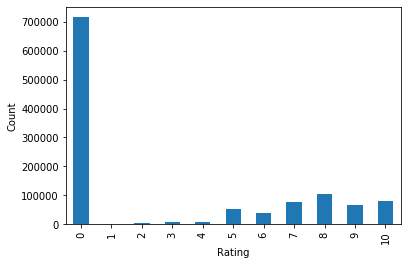

In [9]:
# As you can see the shape is not equal, so let us analyze it
ratings_df['book_rating'].value_counts(sort= False).plot(kind = 'bar')
plt.xlabel('Rating')
plt.ylabel('Count')

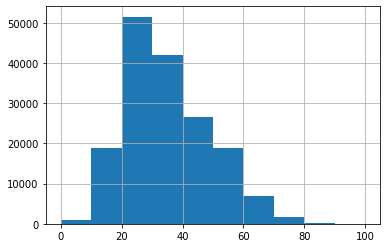

In [10]:
users_df['age'].hist(bins = [0,10,20,30,40,50,60,70,80,90,100])

#### Recommendation Based on Rating Count

In [11]:
high_rated = pd.DataFrame(ratings_df.groupby('ISBN')['book_rating'].count().sort_values(ascending = False))
high_rated.head()

,book_rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [12]:
# Now taking only the first 5 highest rated books and merging its data.
high_rated_isbn = pd.DataFrame(['0971880107','0316666343','0385504209','0060928336','0312195516'],columns=['ISBN'])
high_rated_books = pd.merge(books_df,high_rated_isbn,on = 'ISBN')
high_rated_books

,ISBN,title,Author,year_of_pub,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
3,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...


#### Recommendation Based on Correlation

In [13]:
mean_rating = pd.DataFrame(ratings_df.groupby('ISBN')['book_rating'].mean())
mean_rating.columns= ['mean_rating']
mean_rating['book_rating'] = ratings_df.groupby('ISBN')['book_rating'].count()
mean_rating.sort_values('book_rating',ascending = False).head()

,mean_rating,book_rating
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


##### As you can see that the books have high rating count but the average rating is very poor. So, we should not recommend that types of books .

### So, Let us exclude those users with less than 200 ratings and books with less than 100 ratings .

In [20]:
user_count = ratings_df['userId'].value_counts()
ratings_df =ratings_df[ratings_df['userId'].isin(user_count[user_count>=200].index)]
rating_count = ratings_df['book_rating'].value_counts()
ratings_df = ratings_df[ratings_df['book_rating'].isin(rating_count[rating_count>=100].index)]

### Rating Matrix

In [15]:
ratings_pivot = ratings_df.pivot(index = 'userId',columns ='ISBN',values ='book_rating')
ratings_pivot.head()

ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userId,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ratings_pivot.shape

(905, 207699)

In [35]:
# Now take any book id(i.e, ISBN) to find its correlation
book_related_to = ratings_pivot['0316666343']
corr_value = ratings_pivot.corrwith(book_related_to)
corr_book = pd.DataFrame(corr_value,columns=['Correlation'])
corr_book.dropna(inplace = True)
corr_summary = corr_book.join(mean_rating['book_rating'])
corr_summary[corr_summary['book_rating']>=300].sort_values('Correlation',ascending=False).head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,book_rating
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.434248,568
0446610038,0.429712,391
0446672211,0.421478,585


In [38]:
# Now you can take the above ISBN's and merge to see the books data
books_rel_to_book = pd.DataFrame(['0312291639','0316601950','0446610038','0446672211'],columns=['ISBN'])
corr_book =pd.merge(books_rel_to_book,books_df,on='ISBN')
corr_book.head()

,ISBN,title,Author,year_of_pub,publisher,imageUrlS,imageUrlM,imageUrlL
0,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
1,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...
2,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
3,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
